<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Root_finding_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals:
- Understand the nature of the root finding problem.
- Use standard tools for rootfinding of polynomials
- Understand bracketting root finding methods
- Understand open root finding methods

#Root finding

The roots (*aka zeros*) of a function are values of function arguments forwhich the function is zero:

Find $x$ such that:
$$ f(x) = 0 $$

It can become complicated when we consider vector $\vec{x}$ and even $\vec{f}$, which may seem complicated at first, but consider a special case of finding the roots of $\vec{f}(\vec{x})$ is our familiar linear system, $A \vec{x} -\vec{b} = \vec{0}$. This topic is mearly the generalization to nonlinear functions.


##Roots of some nonlinear functions

Let's build some intuition by exploring some type of roots in 1D functions using the *graphical method*: Plot the function and examine where it crosses the x-axis.

NB: Note the structure of the code below - Since we don't know *a priori* where the roots will be, we have to take a series of initial guesses and cross our finger....  and even then we may fail to find them all!

In [2]:
# prompt: Define a function that takes a function, plots it with xrange -10 to 10 and y range -10 to 10 with a line, solves for the roots using fsolve if the roots were found, plot them with dots
# NB: Modified from original output

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def plot_and_find_roots(func):
  """Plots a function and finds its roots using fsolve.

  Args:
    func: The function to plot and find roots for.
  """

  x = np.linspace(-10, 10, 400)
  y = func(x)

  plt.figure(figsize=(8, 6))
  plt.plot(x, y, label='f(x)')
  plt.axhline(y=0, color='black', linestyle='--')  # Plot the x-axis
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title('Plot of f(x) and its Roots')
  plt.xlim([-10, 10])
  plt.ylim([-10, 10])

  x0s = np.arange(-10,10,1)
  for x0 in x0s:
    r = root(func, x0=x0)
    if r.success:
      plt.plot(r.x, r.fun, 'ro', markersize=8)  # Plot root with a red dot
    plt.legend(['f(x)', 'Roots'])

  plt.grid(True)
  plt.show()

#### Example 1: Real roots - $x^2-4$

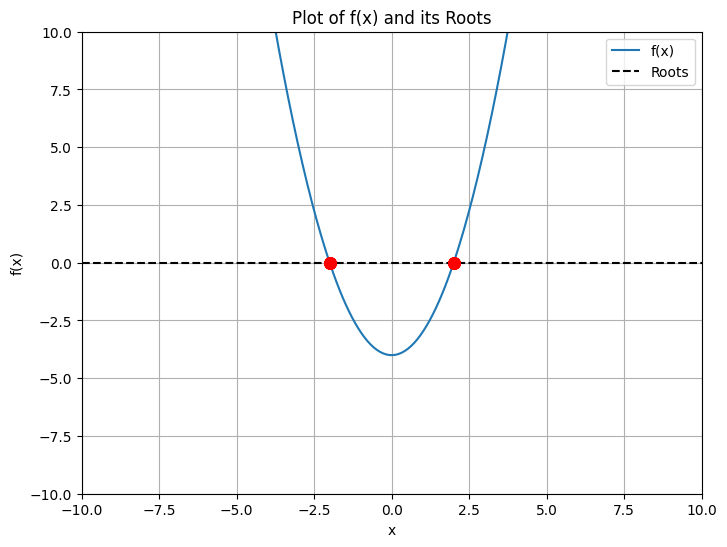

In [3]:
plot_and_find_roots(lambda x: x**2-4)

#### Example 2: No roots - $1/x$

<ipython-input-4-f7fd98d7a758>:1: RuntimeWarning: divide by zero encountered in divide
  plot_and_find_roots(lambda x: 1/x)


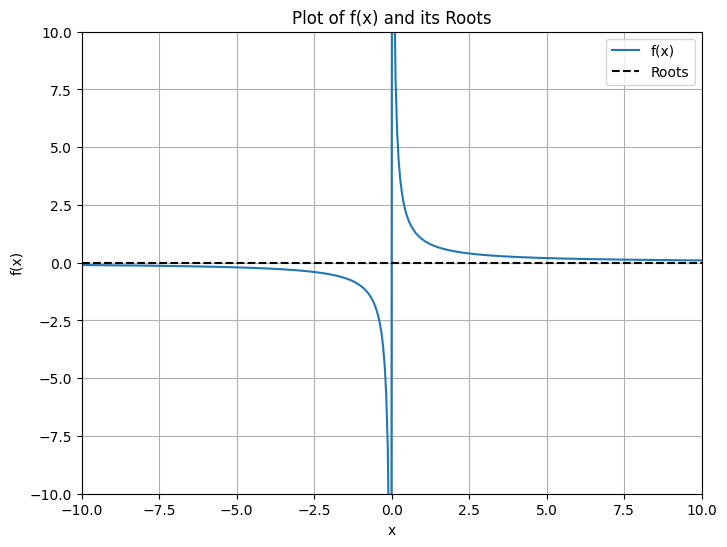

In [4]:
plot_and_find_roots(lambda x: 1/x)

Noting that the vertical line is a plotting artifact.

#### Example 3: Infinite roots $sin(x^2)$

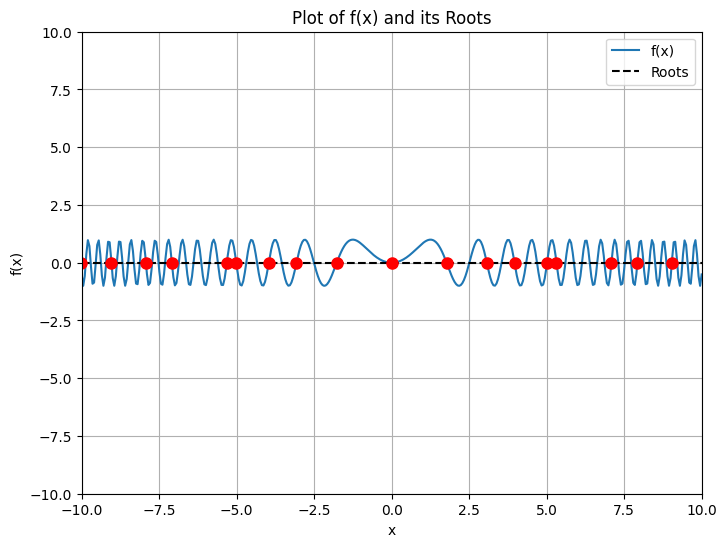

In [5]:
plot_and_find_roots(lambda x: np.sin(x**2))

Only the roots closest to the initial guesses are found!

## Complex roots - $x^2+1$

Even the graphical method is not completely reliable due to the existence of *complex roots*

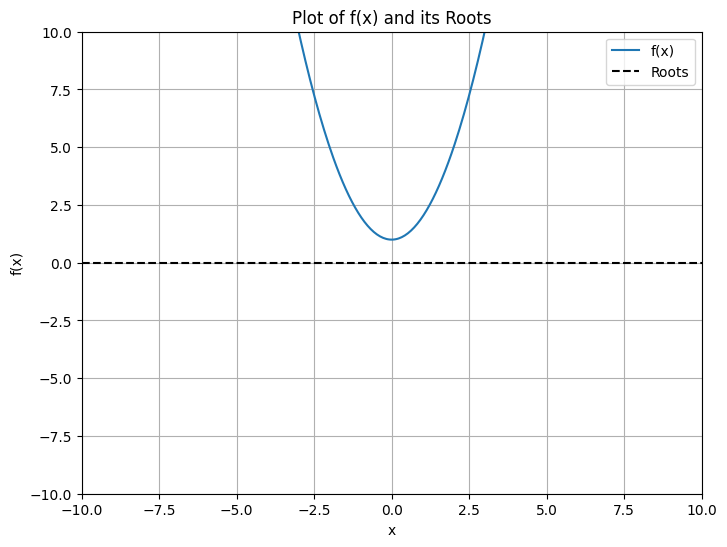

In [6]:
def fun(x):
  return x**2 + 1

# Wrong!
plot_and_find_roots(fun)

**But this is wrong!** The quadratic has 2 roots but we need to use a different method:

In [ ]:
root(lambda x: x**2+1, x0 = [1+1j, 1-1j], method = "krylov")

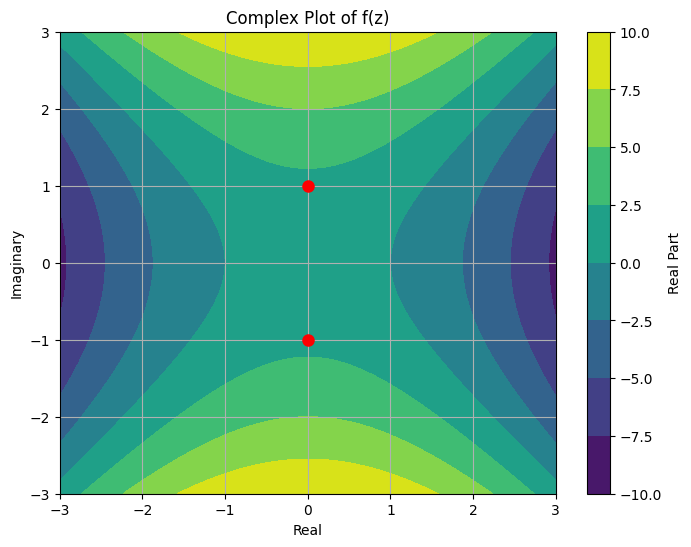

In [7]:
# prompt: Do a complex plot of x**2+1 and add points at the roots

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def complex_plot(func):
  """Plots a complex function and finds its roots using root.

  Args:
    func: The function to plot and find roots for.
  """

  real_range = np.linspace(-3, 3, 100)
  imag_range = np.linspace(-3, 3, 100)

  real_part = np.empty((len(real_range), len(imag_range)))
  imag_part = np.empty((len(real_range), len(imag_range)))

  for i, real in enumerate(real_range):
    for j, imag in enumerate(imag_range):
      z = complex(real, imag)
      result = func(z)
      real_part[i, j] = result.real
      imag_part[i, j] = result.imag

  plt.figure(figsize=(8, 6))
  plt.contourf(real_range, imag_range, real_part, cmap='viridis')
  plt.colorbar(label='Real Part')
  plt.xlabel('Real')
  plt.ylabel('Imaginary')
  plt.title('Complex Plot of f(z)')
  plt.grid(True)

  # Find roots and plot them
  r = root(lambda x: x**2 + 1, x0=[1 + 1j, 1 - 1j], method="krylov")
  if r.success:
    for root_val in r.x:
      plt.plot(root_val.real, root_val.imag, 'ro', markersize=8)  # Plot root with a red dot

  plt.show()


# Use the function to plot x**2 + 1
complex_plot(lambda z: z**2 + 1)


DON'T WORRY - We won't be dealing with complex numbers in general in this course :-)

## Polynomial roots

Polynomial roots are *nice* because we can solve for them directly. Polynomials of degree $n$ have exactly $n$ roots, including multiplicity (coincident roots). The roots may be complex, even in polynomials with real coefficients. If the root is complex ($a+bi$), then its *complex conjugate* ($a-bi$) is also a root.

The roots of polynomials of order $\le 4$ can be solved analytically.

E.g.:

$a x^2 +b x + c = 0$

has roots:

$x = \frac{-b \pm \sqrt{b^2-4ac}} {2a}$

per the quadratic formula.  

Certaint polynomials of order $\gt 4$ may have analytically solvable roots but there is no such general formula per the Abel-Ruffini theorem.

All the roots of polynomials may be found numerically by solving for the eigenvalues of the polynomial *companion matrix*. This is the basis for modern numerical methods which we will cover when we get to matrix eigenvalue calculations.

#### Example usage of numerical root finding tools.

In [8]:
# prompt: Give me a 10th order polynomial with integer coefficients,, print the polynomial, its companion matrix to 2 decimal places, and then list the roots

import numpy as np
from scipy.linalg import companion

# Define the coefficients of the polynomial
coefficients = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Print the polynomial
print("Polynomial:")
print(np.poly1d(coefficients))

# Calculate the companion matrix
companion_matrix = companion(coefficients)

# Print the companion matrix
print("\nCompanion Matrix:")
print(np.round(companion_matrix, 2))

# Find the eigenvalues (roots) of the companion matrix
roots = np.linalg.eigvals(companion_matrix)

# Print the roots
print("\nRoots from eigenvalues of companion matrix:")
print(np.round(roots, 2))

print("\nRoots from 'roots' function:")
print(np.round(np.roots(coefficients),2))



Polynomial:
   10     9     8     7     6     5     4     3     2
1 x  + 2 x + 3 x + 4 x + 5 x + 6 x + 7 x + 8 x + 9 x + 10 x + 11

Companion Matrix:
[[ -2.  -3.  -4.  -5.  -6.  -7.  -8.  -9. -10. -11.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.   0.]]

Roots from eigenvalues of companion matrix:
[-1.26+0.36j -1.26-0.36j -0.88+0.96j -0.88-0.96j -0.25+1.26j -0.25-1.26j
  0.44+1.17j  0.44-1.17j  0.95+0.73j  0.95-0.73j]

Roots from 'roots' function:
[-1.26+0.36j -1.26-0.36j -0.88+0.96j -0.88-0.96j -0.25+1.26j -0.25-1.26j
  0.44+1.17j  0.44-1.17j  0.95+0.73j  0.95-0.73j

Note: in many software environments, $j$ is used as the imaginary number instead of $i$.

#Iterative root-finding methods

The roots of nonlinear functions are more complicated than linear functions. We can seldom solve for the roots directly (notable exception being polynomial functions), and instead will need to *search* for them iteratively.

Iterative search methods are characterized by their *order of convergence*, which measure how successive guesses approach the true root. Given the true root $x$, we can check how successive guesses approach it by calculating the error:

$$ x^{i+1}-x \propto [x^{i}-x]^k $$

where $k$ is the order.

##Bracketting methods

Bracketing methods exploits the fact that functions change sign across the roots of a 1-D function (a simple applicaiton of the intermediate value theorem). This does not work for certain cases (eg: $1/x$).



###Bisection methods

Bisection methods are essentially a binary search for the root. If $f(x)$ is continuous between bounds $a$ and $b>a$ and $f(a)$ and $f(b)$ are opposite signs, there must be a point $c$ where $f(c)=0$.

The algorithm is:
> Given brackets $a$ and $b$
>
> Calculate the midpoint $c = (b-a)/2$.
>
> If $f(c) \approx 0$ or $a \approx b$: exit.
>
> If $f(c)>0$: set $a = c$
>
> If $f(c)<0$: set $b = c$
>
> repeat



Graphically this is:


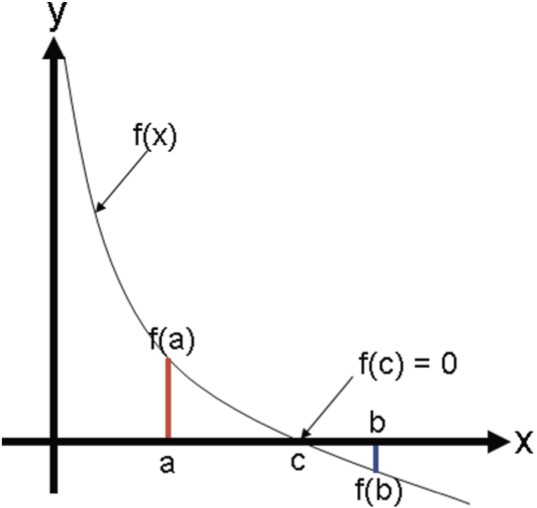

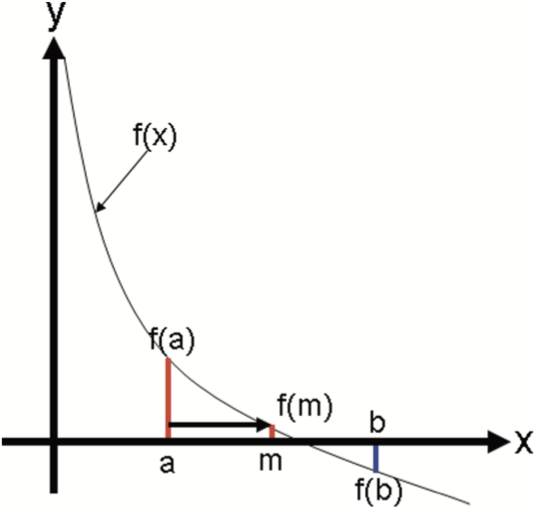

In [10]:
# prompt: Find the root of x^2-2 using bisect

from scipy.optimize import bisect

def f(x):
  return x**2 - 2

print('Setting x tolerance: \n')
xtols = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
for xtol in xtols:
  print(bisect(f, 1, 2, maxiter = 100, xtol = xtol))


print('\nSetting relative tolerance \n', bisect(f, 1, 2, maxiter = 100, rtol = 1e-12))

Setting x tolerance: 

1.4375
1.4140625
1.4150390625
1.41424560546875
1.4142074584960938

Setting relative tolerance 
 1.4142135623715149


The error of the Bisection Method generaly follows:

$$ x^{i+1}-x = \frac{1}{2} [x^{i}-x] $$

and therefore has a linear order of convergence ($k=1$).

### Method of False Position (Regula falsi)

Let's use more information! In bisection we are only interested in $f(a,b)$ switching signs, but it stands to reason the larger $f(b)$ is compared to $f(a)$, the further the root is from $b$!

The method of false position uses this information to determine the next candidate solution:

$$ c= b - f(b) \frac{b-a}{f(b)-f(a)} $$

The same algorithm as for bisection is then applied to replace either $a$ or $b$ with $c$ so that the root remains bracketted.

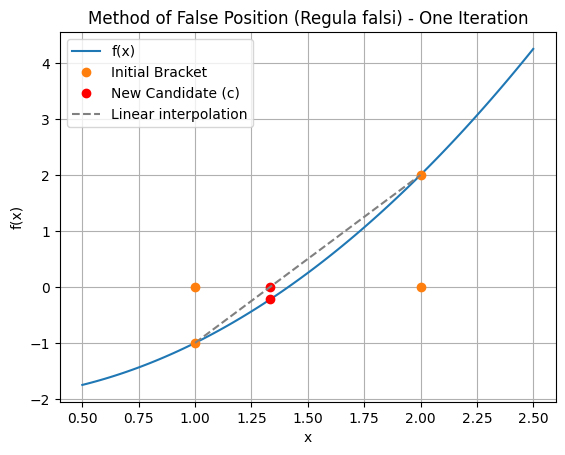

In [11]:
# prompt: Give me a plot that illustrates the method of false position using one iteration, showing a line between the original brackets

import numpy as np
import matplotlib.pyplot as plt


def f(x):
  return x**2 - 2

# Example values for a and b
a = 1
b = 2

# Calculate f(a) and f(b)
fa = f(a)
fb = f(b)

# Calculate the next candidate solution c using the method of false position
c = b - fb * (b - a) / (fb - fa)
fc = f(c)

# Generate x values for the plot
x = np.linspace(a - 0.5, b + 0.5, 100)

# Plot the function
plt.plot(x, f(x), label='f(x)')

# Plot the initial bracket
plt.plot([a, b, a, b], [fa, fb, 0, 0], 'o', label='Initial Bracket')

# Plot the new candidate solution c
plt.plot([c, c], [fc, 0], 'ro', label='New Candidate (c)')


# Plot the line connecting (a, f(a)) and (b, f(b))
plt.plot([a, b], [fa, fb], '--', color='gray', label='Linear interpolation')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Method of False Position (Regula falsi) - One Iteration')
plt.legend()
plt.grid(True)
plt.show()


Note that the line joining the brackets approximates the tangent of the curve.

The method of False Position has an order of convergence of 1.618 (the Golden Ratio!):

$$ x^{i+1}-x \propto [x^i-x]^{1.618} $$

This is considered *superlinear* and a good thing!

## Summary of bracketting methods

Bracketting methods are usually robust but slow to converge and generlization to N-D is not trivial.

Through incorporating the additional information of linear interpolation, the method of Flase Position achieves superlinear convergence.

But bracketting is complicated in N-D, so let's try to remove it.

# Open methods

Another class of root finding algorithms do not require bracketting, and are therefore deemed *open*. This alleviates the issue of N-D dimensionalization at the expense of robustness. They are usually faster than bracketting methods since we are not constantly updating the brackets, but our method is now succeptible to divergence.  

## Secant method

Let's reconsider the method of False Position but now we always disregard bracket updating and simply take $c$ as our new guess. Our algorithm is now:

> Take 2 initial guesses: $x^i$
>
> Calculate the next guess:

$$x^{i+1} = {x^i} - f(x^{i}) \frac{x^i-x^{i-1}}{f(x^i)-f(x^{i-1})} $$

> Check if tolerance is met

(Which tolerance?)

Iteration 0: x = 2
Iteration 1: x = 1.3333333333333335
Iteration 2: x = 1.4000000000000001
Iteration 3: x = 1.4146341463414633
Iteration 4: x = 1.41421143847487
Iteration 5: x = 1.4142135620573204
Approximate root: 1.4142135620573204

The sequence of errors is:
Iteration,  0  error in x is  0.4142135620573204
Iteration,  1  error in x is  0.5857864379426796
Iteration,  2  error in x is  0.08088022872398692
Iteration,  3  error in x is  0.014213562057320273
Iteration,  4  error in x is  0.00042058428414293303
Iteration,  5  error in x is  2.12358245033073e-06
Iteration,  6  error in x is  0.0


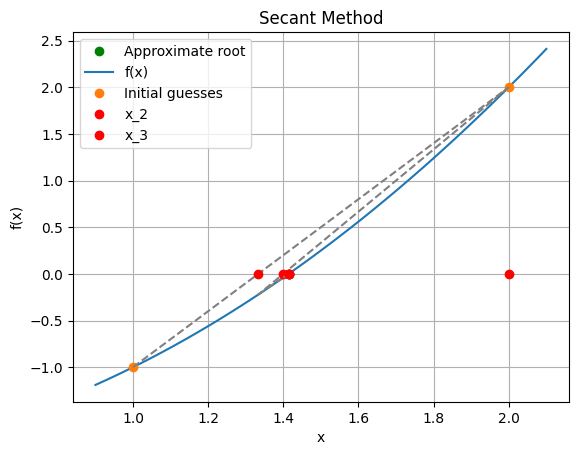

In [12]:
# prompt: Solve x^2-2 using the secant method, plotting each step with lines and each guess with points on the x-axis

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**2 - 2

def secant_method(f, x0, x1, tolerance=1e-6, max_iterations=100):
  """
  Finds the root of a function using the secant method.

  Args:
    f: The function to find the root of.
    x0: The initial guess.
    x1: The second initial guess.
    tolerance: The desired tolerance for the root.
    max_iterations: The maximum number of iterations.

  Returns:
    The approximate root of the function.
  """
  print(f"Iteration 0: x = {x1}")
  x_values = [x0, x1]
  for i in range(max_iterations):
    x_new = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
    x_values.append(x_new)
    print(f"Iteration {i+1}: x = {x_new}")
    if abs(f(x_new)) < tolerance:
      return x_new, x_values
    x0 = x1
    x1 = x_new
  return None, x_values

# Initial guesses
x0 = 1
x1 = 2

# Find the root using the secant method
root, x_values = secant_method(f, x0, x1)


if root:
    print("Approximate root:", root)
    plt.plot(root, 0, 'go', label='Approximate root')
else:
    print("Secant method did not converge within the maximum number of iterations.")

error = abs(np.array(x_values)-root)
print("\nThe sequence of errors is:")
for i,e in enumerate(error):
  print('Iteration, ', i, ' error in x is ', e)


# Plot the function and the secant method iterations
x = np.linspace(.9, 2.1, 100)
plt.plot(x, f(x), label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Secant Method')
plt.grid(True)

# Plot the initial guesses
plt.plot([x0, x1], [f(x0), f(x1)], 'o', label='Initial guesses')

# Plot each iteration of the secant method
for i in range(len(x_values) - 1):
    plt.plot([x_values[i], x_values[i+1]], [f(x_values[i]), f(x_values[i+1])], '--', color='gray')
    plt.plot(x_values[i+1], 0, 'ro', label=f'x_{i+2}' if i < 2 else None)


plt.legend()
plt.show()


The Secant method maintains superlinear convergence
...
but we can do better with a little more information...

## The Newton-Raphson method

Take another look at the fraction in the Secant method update equation:

$$x^{i+1} = {x^i} - f(x^{i}) \frac{x^i-x^{i-1}}{f(x^i)-f(x^{i-1})} $$

This is an (inverse) approximation of $\frac{\partial f}{\partial x}$, the derivative of $f$! Typically, we are able to find this quantity, and the algorithm becomes:



$$ x^{i+1} = {x^i} - \frac{f(x^{i})}{f'(x^i)} $$

or, solving for the increment $\Delta x = x^{i+1}-x^i$ and dropping the indicies,

$$ \begin{align}
\Delta x &= - \frac{f(x)}{f'(x)} \\
f'(x) \Delta x &= - f(x)
\end{align}
$$

Iteration 0: x = 1
Iteration 1: x = 1.5
Iteration 2: x = 1.4166666666666667
Iteration 3: x = 1.4142156862745099
Iteration 4: x = 1.4142135623746899
Approximate root: 1.4142135623746899

The sequence of errors is:
Iteration,  0  error in x is  0.41421356237468987
Iteration,  1  error in x is  0.08578643762531013
Iteration,  2  error in x is  0.002453104291976871
Iteration,  3  error in x is  2.123899820016817e-06
Iteration,  4  error in x is  0.0


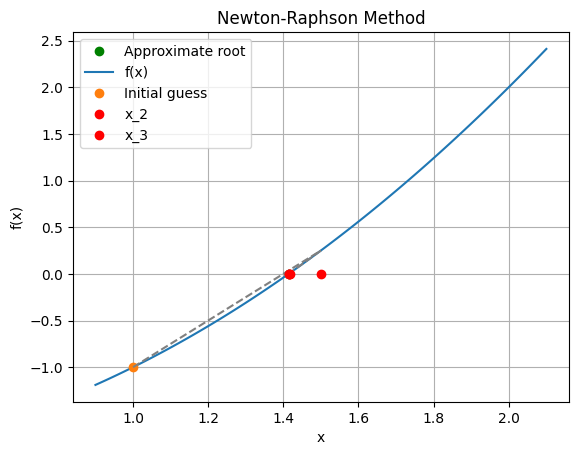

In [13]:
# prompt: Repeat the root finding using Newton's method and scipy tools

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**2 - 2

def df(x):
  return 2*x

def newton_raphson(f, df, x0, tolerance=1e-6, max_iterations=100):
  """
  Finds the root of a function using the Newton-Raphson method.

  Args:
    f: The function to find the root of.
    df: The derivative of the function.
    x0: The initial guess.
    tolerance: The desired tolerance for the root.
    max_iterations: The maximum number of iterations.

  Returns:
    The approximate root of the function.
  """

  x_values = [x0]
  print(f"Iteration 0: x = {x0}")
  for i in range(max_iterations):
    x_new = x0 - f(x0) / df(x0)
    x_values.append(x_new)
    print(f"Iteration {i+1}: x = {x_new}")
    if abs(f(x_new)) < tolerance:
      return x_new, x_values
    x0 = x_new
  return None, x_values

# Initial guess
x0 = 1

# Find the root using the Newton-Raphson method
root, x_values = newton_raphson(f, df, x0)

if root:
    print("Approximate root:", root)
    plt.plot(root, 0, 'go', label='Approximate root')
else:
    print("Newton-Raphson method did not converge within the maximum number of iterations.")

error = abs(np.array(x_values)-root)
print("\nThe sequence of errors is:")
for i,e in enumerate(error):
  print('Iteration, ', i, ' error in x is ', e)


# Plot the function and the Newton-Raphson method iterations
x = np.linspace(.9, 2.1, 100)
plt.plot(x, f(x), label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton-Raphson Method')
plt.grid(True)

# Plot the initial guess
plt.plot([x0], [f(x0)], 'o', label='Initial guess')

# Plot each iteration of the Newton-Raphson method
for i in range(len(x_values) - 1):
    plt.plot([x_values[i], x_values[i+1]], [f(x_values[i]), f(x_values[i+1])], '--', color='gray')
    plt.plot(x_values[i+1], 0, 'ro', label=f'x_{i+2}' if i < 2 else None)


plt.legend()
plt.show()

The Newton-Raphson method has quadratic convergence ($k=2$) *near the root* which is a great result! It does so, however at the cost of calculating the Jacobian and solving a linear system.